<a href="https://colab.research.google.com/github/grace020503/CV/blob/main/CV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 과제 2

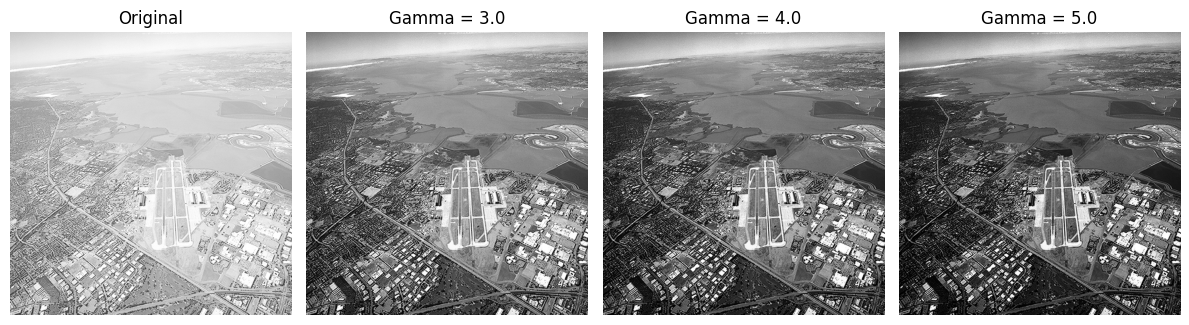

In [ ]:
#HW2-1
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

url = 'https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0309(a)(washed_out_aerial_image).tif'
image = io.imread(url)

# 정규화
normalized_img = image / 255.0

# 감마 보정
def gamma_correction(img, gamma, c=1):
    corrected = c * (img ** gamma)
    corrected = np.clip(corrected, 0, 1)
    return corrected

# 실험할 감마 값
gammas = [3.0, 4.0, 5.0]

# 결과 출력
plt.figure(figsize=(12, 6))
plt.subplot(1, len(gammas) + 1, 1)
plt.imshow(image, cmap='gray')
plt.title('Original')
plt.axis('off')

# 감마 값 변환 결과
for i, gamma in enumerate(gammas):
    result = gamma_correction(normalized_img, gamma)
    plt.subplot(1, len(gammas) + 1, i+2)
    plt.imshow(result, cmap='gray')
    plt.title(f'Gamma = {gamma}')
    plt.axis('off')

plt.tight_layout()
plt.show()

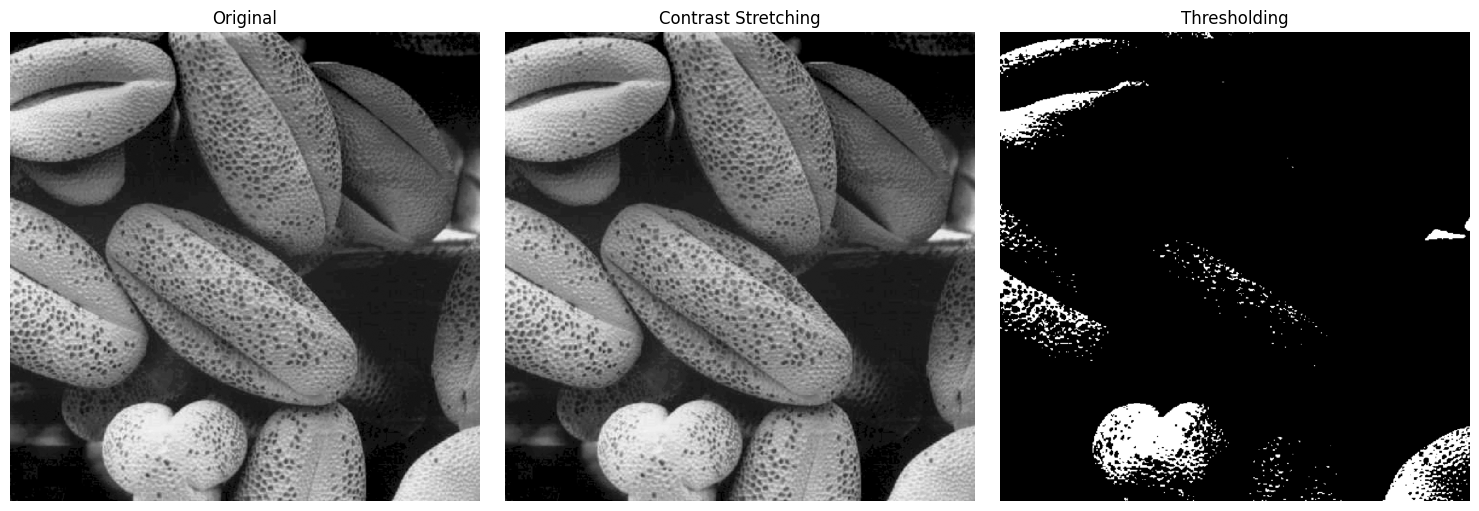

In [ ]:
#HW2-2
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

url = 'https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0310(b)(washed_out_pollen_image).tif'
image = io.imread(url)

# 정규화
image_norm = image / 255.0

# Contrast Stretching
def contrast_stretch(img, r1, s1, r2, s2):
    img_stretch = np.zeros_like(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            r = img[i, j]
            if r < r1:
                img_stretch[i, j] = (s1 / r1) * r
            elif r < r2:
                img_stretch[i, j] = ((s2 - s1) / (r2 - r1)) * (r - r1) + s1
            else:
                img_stretch[i, j] = ((1 - s2) / (1 - r2)) * (r - r2) + s2
    return np.clip(img_stretch, 0, 1)

# Thresholding
def thresholding(img, thresh=0.5):
    return (img > thresh).astype(float)

# 파라미터 설정
r1, s1 = 0.3, 0.0
r2, s2 = 0.7, 1.0

# 처리 결과
contrast_img = contrast_stretch(image_norm, r1, s1, r2, s2)
threshold_img = thresholding(image_norm, thresh=0.5)

# 결과
titles = ['Original', 'Contrast Stretching', 'Thresholding']
images = [image_norm, contrast_img, threshold_img]

plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


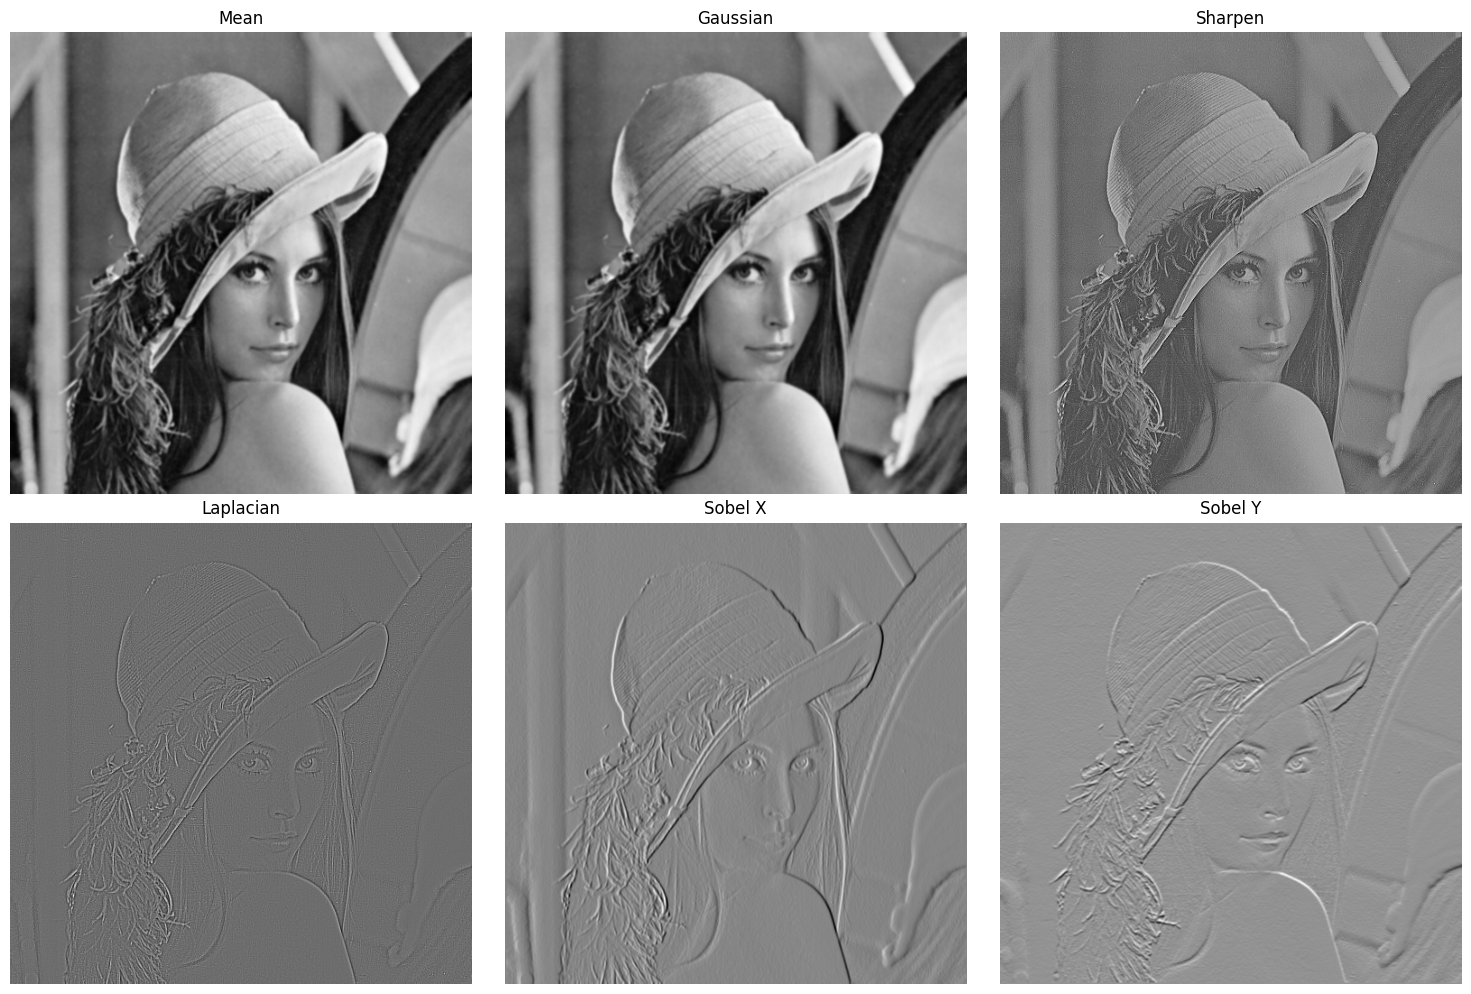

In [ ]:
#HW2-3
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

url = 'https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg'
img = io.imread(url, as_gray=True)

# 마스크 정의
mean_filter = np.ones((3, 3)) / 9

gaussian_filter = np.array([
    [0.0030, 0.0133, 0.0219, 0.0133, 0.0030],
    [0.0133, 0.0596, 0.0983, 0.0596, 0.0133],
    [0.0219, 0.0983, 0.1621, 0.0983, 0.0219],
    [0.0133, 0.0596, 0.0983, 0.0596, 0.0133],
    [0.0030, 0.0133, 0.0219, 0.0133, 0.0030]
])

sharpen_filter = np.array([
    [ 0, -1,  0],
    [-1,  5, -1],
    [ 0, -1,  0]
])

laplacian_filter = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
])

sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

sobel_y = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
])

# 필터 적용
def apply_filter(img, kernel):
    return cv2.filter2D(img, -1, kernel)

# 적용
filtered_imgs = [
    apply_filter(img, mean_filter),
    apply_filter(img, gaussian_filter),
    apply_filter(img, sharpen_filter),
    apply_filter(img, laplacian_filter),
    apply_filter(img, sobel_x),
    apply_filter(img, sobel_y)
]

titles = ['Mean', 'Gaussian', 'Sharpen', 'Laplacian', 'Sobel X', 'Sobel Y']

# 시각화
plt.figure(figsize=(15, 10))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(filtered_imgs[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


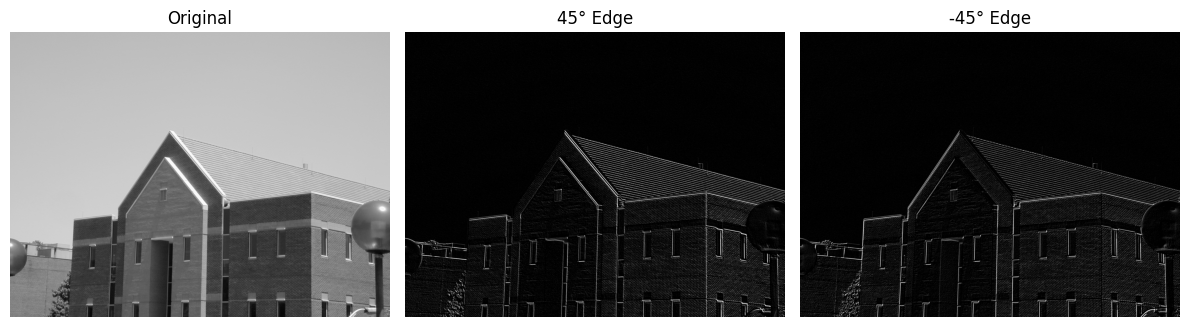

In [ ]:
#HW2-4
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

url = 'https://raw.githubusercontent.com/kjcheoi-class/CV/main/school.jpg'
img = io.imread(url, as_gray=True)

# 45도 방향 Sobel
sobel_45 = np.array([
    [ 0,  1,  2],
    [-1,  0,  1],
    [-2, -1,  0]
])

# -45도 방향 Sobel
sobel_minus_45 = np.array([
    [ 2,  1,  0],
    [ 1,  0, -1],
    [ 0, -1, -2]
])

# 필터 적용
def apply_filter(img, kernel):
    return cv2.filter2D(img, -1, kernel)

# 적용
edge_45 = apply_filter(img, sobel_45)
edge_m45 = apply_filter(img, sobel_minus_45)

# 결과
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(edge_45, cmap='gray')
plt.title('45° Edge')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(edge_m45, cmap='gray')
plt.title('-45° Edge')
plt.axis('off')

plt.tight_layout()
plt.show()


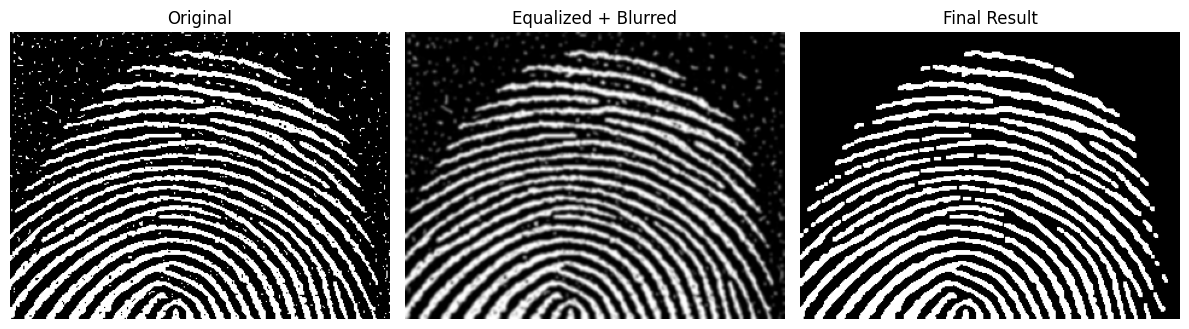

In [ ]:
#HW2-5
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

url = "https://raw.githubusercontent.com/kjcheoi-class/CV/main/finger.jpg"
img = io.imread(url)

# grayscale
if len(img.shape) == 3:
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
else:
    gray = img.copy()

# 히스토그램 평탄화
equalized = cv2.equalizeHist(gray)

# 가우시안 블러
blurred = cv2.GaussianBlur(equalized, (5, 5), 0)

# Otsu Thresholding
_, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Morphological Opening
kernel = np.ones((3,3), np.uint8)
opened = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)

# 시각화
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Equalized + Blurred")
plt.imshow(blurred, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Final Result")
plt.imshow(opened, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


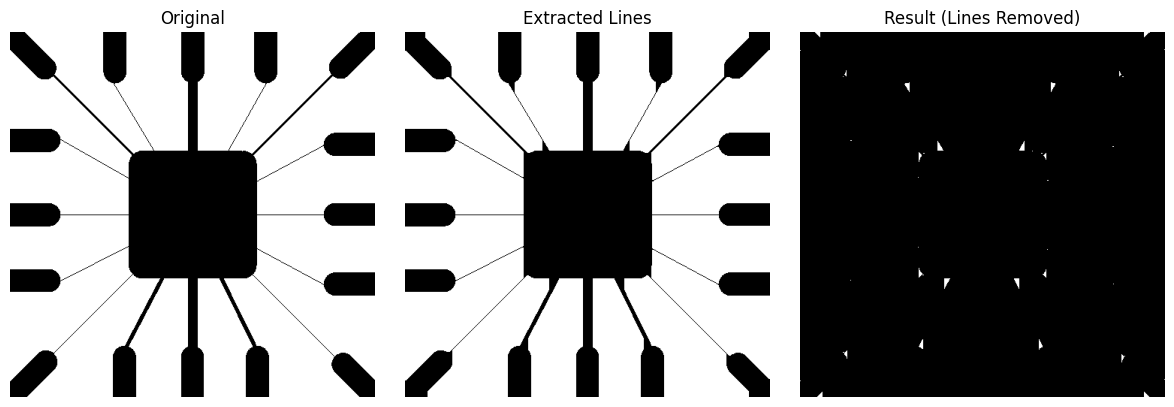

In [ ]:
#HW2-6
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

url = "https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0905(a)(wirebond-mask).tif"
img = io.imread(url, as_gray=True)
img = (img * 255).astype(np.uint8)

# 구조물 제거용 세로/대각선 구조화 요소
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 15))  # 세로 길쭉한 커널

# Morphological Opening- 얇은 선 제거
opened = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

# 선 제거된 이미지
result = cv2.subtract(img, opened)

# 시각화
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.title("Original")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title("Extracted Lines")
plt.imshow(opened, cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title("Result (Lines Removed)")
plt.imshow(result, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


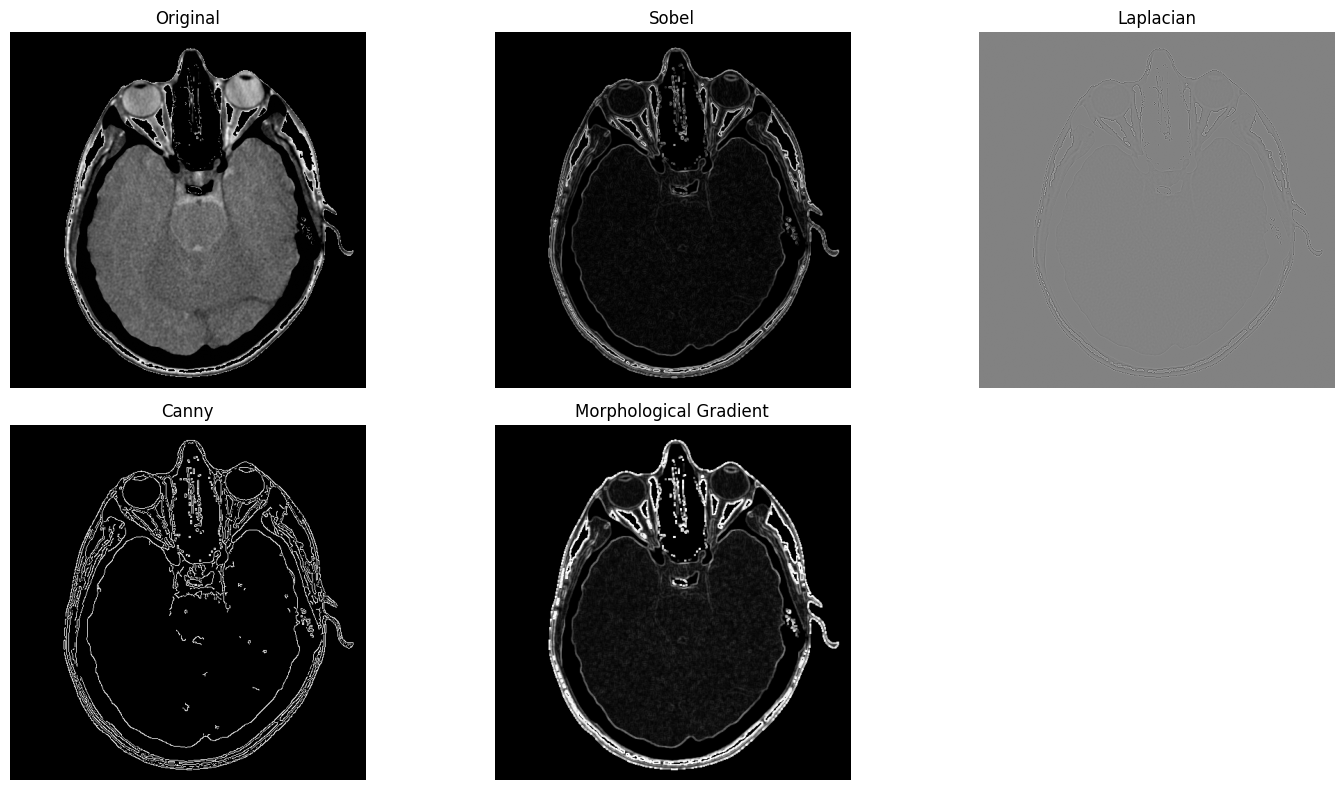

In [ ]:
#HW2-7
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

url = 'https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0939(a)(headCT-Vandy).tif'
img = io.imread(url, as_gray=True)
img = (img * 255).astype(np.uint8)

# Sobel
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
sobel = cv2.magnitude(sobelx, sobely)

# Laplacian
laplacian = cv2.Laplacian(img, cv2.CV_64F)

# Canny
canny = cv2.Canny(img, 100, 200)

# Morphological Gradient
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
morph_grad = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

# 시각화
titles = ['Original', 'Sobel', 'Laplacian', 'Canny', 'Morphological Gradient']
images = [img, sobel, laplacian, canny, morph_grad]

plt.figure(figsize=(15,8))
for i in range(5):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


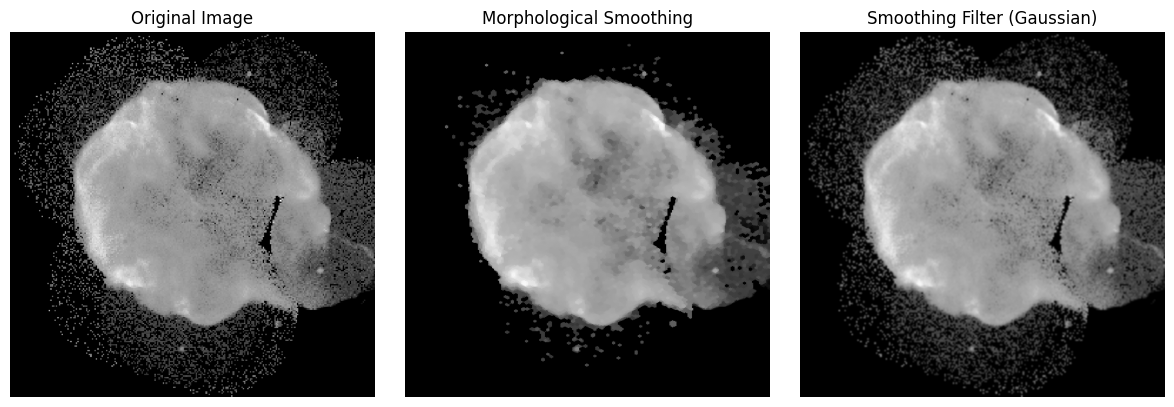

In [ ]:
#HW2-8
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

url = "https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0938(a)(cygnusloop_Xray_original).tif"
image = io.imread(url)

# Morphological Smoothing
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
morph = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
morph = cv2.morphologyEx(morph, cv2.MORPH_CLOSE, kernel)

# 📌 Smoothing Filter (Gaussian Blur)
smooth = cv2.GaussianBlur(image, (5, 5), 0)

# 결과
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(morph, cmap='gray')
plt.title('Morphological Smoothing')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(smooth, cmap='gray')
plt.title('Smoothing Filter (Gaussian)')
plt.axis('off')

plt.tight_layout()
plt.show()


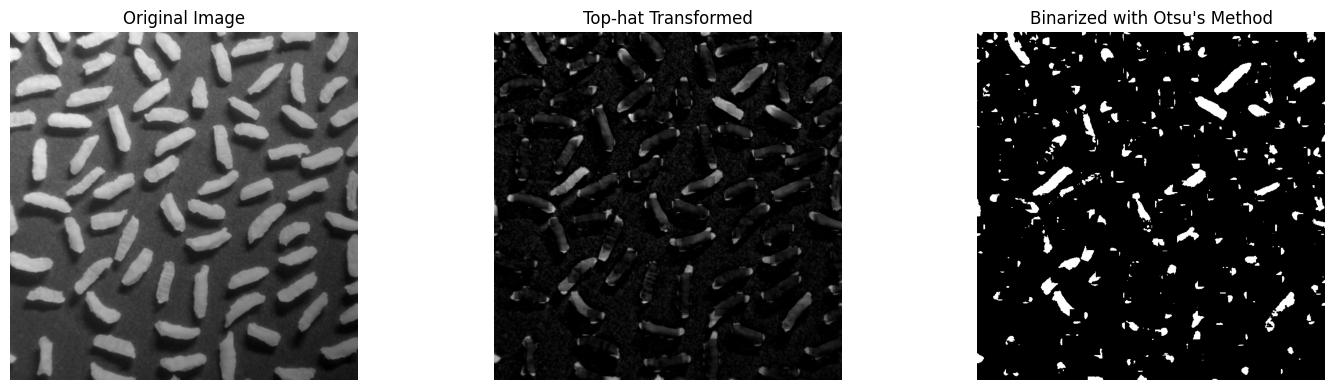

In [ ]:
#HW2-9
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

url = "https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0940(a)(rice_image_with_intensity_gradient).tif"
image = io.imread(url)

# 그레이스케일 변환
if len(image.shape) == 3:
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Top-hat 변환
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 15))  # 커널 크기는 조절 가능
tophat = cv2.morphologyEx(image, cv2.MORPH_TOPHAT, kernel)

# Otsu의 자동 임계값을 통한 binary
 otsu_bin = cv2.threshold(tophat, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# 결과
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(tophat, cmap='gray')
plt.title('Top-hat Transformed')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(otsu_bin, cmap='gray')
plt.title("Binarized with Otsu's Method")
plt.axis('off')

plt.tight_layout()
plt.show()


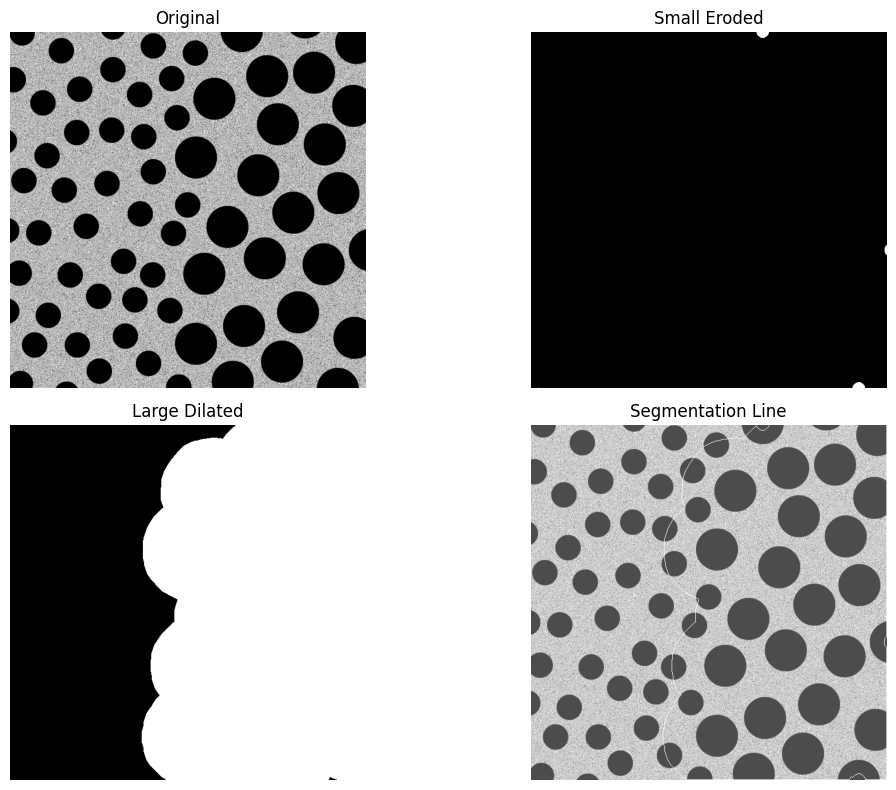

In [35]:
#HW2-10
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

url = "https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0943(a)(dark_blobs_on_light_background).tif"
resp = urllib.request.urlopen(url)
image_np = np.asarray(bytearray(resp.read()), dtype="uint8")
gray = cv2.imdecode(image_np, cv2.IMREAD_GRAYSCALE)
original_color = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)

# 이진화
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# 작은 원 큰 원의 영역 분리
num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(binary, connectivity=8)

# 작은 원, 큰 원 분리
area_threshold = 2000  # 작은 원 넓이 이상으로 설정
small_mask = np.zeros_like(binary)
large_mask = np.zeros_like(binary)

for i in range(1, num_labels):  # 0은 배경으로 구분
    area = stats[i, cv2.CC_STAT_AREA]
    if area < area_threshold:
        small_mask[labels == i] = 255
    else:
        large_mask[labels == i] = 255

# 침식, 팽창
kernel_small = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (25, 25))
kernel_large = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (55, 55))

small_eroded = cv2.erode(small_mask, kernel_small, iterations=2)
large_dilated = cv2.dilate(large_mask, kernel_large, iterations=2)

# 경계 추출
segmentation = cv2.subtract(large_dilated, small_eroded)

# 윤곽선 추출
contours, _ = cv2.findContours(segmentation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
boundary_only = np.zeros_like(binary)
cv2.drawContours(boundary_only, contours, -1, 255, 1)

# 윤곽선 표시
overlay = original_color.copy()
overlay[boundary_only == 255] = [255, 255, 255]

titles = ['Original', 'Small Eroded', 'Large Dilated', 'Segmentation Line']
images = [gray, small_eroded, large_dilated, overlay]

plt.figure(figsize=(12, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    if i == 3:
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()
